In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import datetime
import time
import json
import plotly.graph_objects as gp
import chart_studio.plotly as py
from plotly.offline import plot 
import seaborn as sns
import json
#%%
# load matchstats.json and prepare the data to be read
# if you want to use it for another match, change the id in the .json and the id of the teams playing

In [6]:
with open('../../data/wyscout/5111384/5111384_matchstats.json', 'r') as f: 
    data = json.load(f)
data['teams']

dict_keys(['general', 'possession', 'openPlay', 'attacks', 'transitions', 'passes', 'defence', 'duels', 'flanks', 'matchId', 'teams'])


{'9109': {'teamId': 9109}, '10073': {'teamId': 10073}}

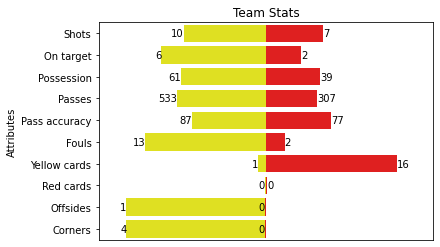

In [8]:
id_austria = '9109'
id_north_macedonia = '10073'
austria = data['general'][id_austria]
north_macedonia = data['general'][id_north_macedonia]

# this lines allow us to obtain the successful passes in percentage
variable_1 = data['passes'][id_austria]['passesSuccessful'] / \
    data['passes'][id_austria]['passes'] * 100
variable_2 = data['passes'][id_north_macedonia]['passesSuccessful'] / \
    data['passes'][id_north_macedonia]['passes'] * 100

# the "-" sign is used to plot the bars to different directions from the origin
df = pd.DataFrame({'Team Stats': ['Shots', 'On target', 'Possession', 'Passes', 'Pass accuracy', 'Fouls', 'Yellow cards', 'Red cards', 'Offsides', 'Corners'],
                   'Austria': [(-1)*austria['shots'], (-1)*austria['shotsOnTarget'], (-1)*data['possession'][id_austria]['possessionPercent'], (-1)*data['passes'][id_austria]['passes'], (-1)*variable_1, (-1)*austria['fouls'], (-1)*austria['yellowCards'], (-1)*austria['redCards'], (-1)*austria['offsides'], (-1)*austria['corners']],
                   'North Macedonia': [north_macedonia['shots'], north_macedonia['shotsOnTarget'], data['possession'][id_north_macedonia]['possessionPercent'], data['passes'][id_north_macedonia]['passes'], variable_2, north_macedonia['yellowCards'], north_macedonia['fouls'], north_macedonia['redCards'], north_macedonia['offsides'], north_macedonia['corners']]})
# prepare data to be plotted
# the plot used is typical in population pyramid studies
aux = -df['Austria']+df['North Macedonia']

real_poland = round(df['North Macedonia'].copy(deep=True))  # prepare labels
real_sweden = round((-1)*df['Austria'].copy(deep=True))  # prepare labels
# normalisation of the data (if not, the "shots" bar would be much bigger than the offsides
df['Austria'] = df['Austria']/aux
# just in case some of the elements of aux = 0. We put -0.01 to make the label visible
df['Austria'] = df['Austria'].replace(np.nan, -0.01)
# needed to make the label visible
df['Austria'] = df['Austria'].replace(0, -0.01)
df['North Macedonia'] = df['North Macedonia']/aux
df['North Macedonia'] = df['North Macedonia'].replace(np.nan, 0.01)
df['North Macedonia'] = df['North Macedonia'].replace(0, -0.01)

# labels and plot format
AgeClass = ['Shots', 'On target', 'Possession', 'Passes', 'Pass accuracy',
            'Fouls', 'Yellow cards', 'Red cards', 'Offsides', 'Corners']


bar_plot = sns.barplot(x='Austria', y='Team Stats', data=df,
                       order=AgeClass, color=[255/255, 255/255, 3/255])


bar_plot.bar_label(bar_plot.containers[0], labels=real_sweden.astype(int))


bar_plot = sns.barplot(x='North Macedonia', y='Team Stats',
                       data=df, order=AgeClass, color='r')
bar_plot.bar_label(bar_plot.containers[1], labels=real_poland.astype(int))


bar_plot.set(xlabel=None, ylabel="Attributes", title="Team Stats")
bar_plot.set(xlim=(-1.2, 1.2), xticklabels=[])
bar_plot.tick_params(bottom=False)
plt.savefig('../../upload/summary/summary_google.png', dpi=300)